## Testing transforms.py

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.plots import *

In [16]:
bb=['108.57', '218.55', '404.67', '396.21']
f="img_06297.jpg"
PIL.Image.open("fastai/images/" + f).size

(1280, 720)

In [15]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color=color, fill=False, lw=3)

def show_bb(bb, f="img_06297.jpg"):
    file_path = f'fastai/images/{f}'
    plots_from_files([file_path])
    plt.gca().add_patch(create_rect(bb))

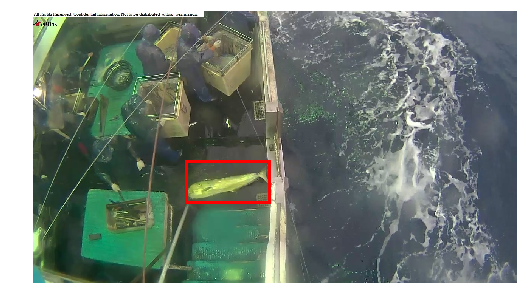

In [17]:
show_bb(bb)

In [104]:
def get_x(f="img_06297.jpg"):
        file_path = f'fastai/images/{f}'
        im = PIL.Image.open(file_path).convert('RGB')
        return np.array(im, dtype=np.float32)/255.

In [118]:
x = get_x()
y = np.array([108.57, 218.55, 404.67, 396.21], dtype=np.float32)

In [119]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color=color, fill=False, lw=3)

def plotXY(x,y):
    plots([x])
    plt.gca().add_patch(create_rect(y))

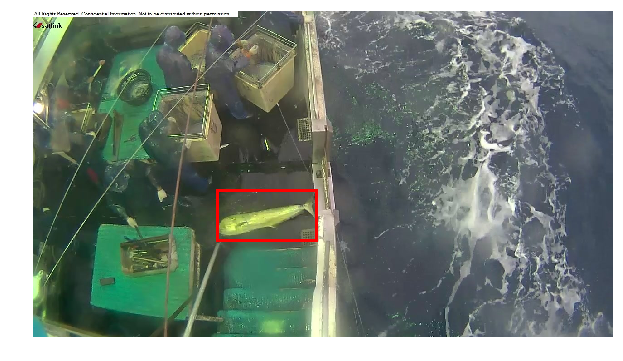

In [177]:
plotXY(x,y)

In [189]:
import enum


class TfmType(enum.Enum):
    NO = 1
    PIXEL = 2
    COORD = 3

class Transform():
    def __init__(self, tfm_y): self.tfm_y=tfm_y
    def __call__(self, x, y):
        x,y = (self.transform(x),y if self.tfm_y==TfmType.NO
                else self.transform(x,y) if self.tfm_y==TfmType.PIXEL
                else self.transform_coord(x,y))
        return x,y

## Random Dihedral

In [199]:
class RandomDihedralXY(Transform):
    def rand_gen(self):
        return random.randint(0,3), random.random()<0.5

    def transform_coord(self, x, y):
        rot_times, do_flip = self.rand_gen()
        x = self.do_transform(x, rot_times, do_flip)
        raise NotImplementedError # XXX: Handle y coord transform
        return x, y

    def transform(self, x, y=None):
        rot_times, do_flip = self.rand_gen()
        x = self.do_transform(x, rot_times, do_flip)
        return (x, do_transform(y, rot_times, do_flip)) if y else x

    def do_transform(self, x, rot_times, do_flip):
        print(rot_times)
        x = np.rot90(x, rot_times)
        print(do_flip)
        return np.fliplr(x).copy() if do_flip else x

In [200]:
trf = RandomDihedralXY(TfmType.NO)

In [205]:
xx, y = trf(x, y)

1
True


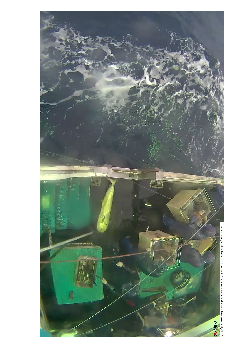

In [206]:
plots([xx])

### Center crop